# 二值化

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [44]:
def cv_show(img):
    cv2.imshow('cv_show', img)
    cv2.waitKey(0)  # 等待时间，毫秒级，0标示按任意键终止
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # 解决mac中窗口不关闭的问题
    
def showImages(images, titles = [''], size = [1, 1], BGR = False):
    for i in range(len(images)):
        plt.subplot(size[0], size[1], i + 1)
        showImage = images[i]
        if (BGR):
            b,g,r = cv2.split(images[i])
            showImage = cv2.merge([r,g,b])
        plt.imshow(showImage ,'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
# np.hstack((img1, img2))

In [45]:
# 色彩空间转换：⬇️
# https://blog.csdn.net/keith_bb/article/details/53470170?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.pc_relevant_default&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.pc_relevant_default&utm_relevant_index=2

img = cv2.imread(
    '/Users/zhouxinyu/Code/Data/ZF-Vision/wuran2.png', cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [46]:
def binarizeWhite(hsvImage):
    lower=np.array([0,0,221])
    upper=np.array([180,80,255])
    mask = cv2.inRange(hsvImage, lower, upper)
    return mask

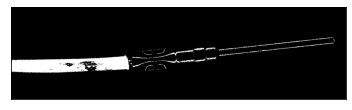

In [47]:
binarized = binarizeWhite(hsv)
showImages([binarized])
cv_show(binarized)

In [48]:
def preProcess(binarizedImg):
    # 开：先腐蚀，再膨胀
    # 作用：腐蚀 > 膨胀，会放大比较小的污染，让边缘平滑一些，减少一些毛边
    opening_kernel = np.ones((5,5), np.uint8)
    opening = cv2.morphologyEx(binarizedImg, cv2.MORPH_OPEN, opening_kernel)
    
    # 腐蚀，
    # 作用：去除掉右侧
    erosion_kernel = np.ones((5,5), np.uint8)
    erosion_opening = cv2.erode(opening, erosion_kernel, iterations = 3)
    
    # 闭操作：先膨胀，再腐蚀
    closing_kernel = np.ones((20,20), np.uint8)
    closing = cv2.morphologyEx(erosion_opening, cv2.MORPH_CLOSE, closing_kernel)
    return opening, erosion_opening, closing

opening, erosion_opening, closing = preProcess(binarized)

cv_show(np.hstack((opening, erosion_opening, closing)))

In [49]:
def blockImg(binarizedImg):
    return NULL

In [50]:
def drawEdge(counterImg):
    de_contours, de_hierarchy = cv2.findContours(counterImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    de_res = cv2.cvtColor(counterImg, cv2.COLOR_GRAY2BGR)
    print("All Touples: ", len(de_contours))
    counter = 0
    minLen = 10
    for size in de_contours:
        if(len(size) > minLen):
            de_res = cv2.drawContours(de_res, [size], -1, (255, 0, 0), 2)
            counter = counter + 1
            print(len(size))
    print("minLen: ", minLen)
    print("Len > minLen: ", counter)
    return de_res, de_contours

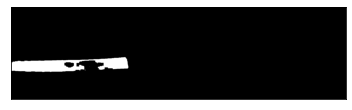

In [103]:
showImages([closing])

All Touples:  4
312
51
minLen:  10
Len > minLen:  2


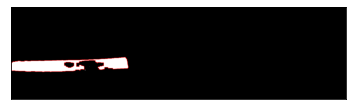

In [51]:
de_img, de_countours = drawEdge(closing)
# print(len(de_countours))
showImages([de_img])
# cv_show(cv2.cvtColor(de_img, cv2.COLOR_BGR2RGB))

In [210]:
def line_detection(image):
#     gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = image
    color_img = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(gray, 50, 150, apertureSize = 3)    #apertureSize是sobel算子大小，只能为1,3,5，7
    lines = cv2.HoughLines(edges, 1, (np.pi/180)*1, 150)  #函数将通过步长为1的半径和步长为π/180的角来搜索所有可能的直线
#     lines_draw = [];
    p_len = 1000
    for line in lines:
        print("Line -> ", len(line[0]), line[0])
        rho,theta = line[0] # 获取极值ρ长度和θ角度
        a = np.cos(theta) #获取角度cos值
        b = np.sin(theta) #获取角度sin值
        x0 = a * rho #获取x轴值
        y0 = b * rho #获取y轴值　　x0和y0是直线的中点
        x1 = int(x0 + p_len) #获取这条直线最大值点x1
        y1 = int(y0 + p_len * (a)) #获取这条直线最大值点y1
        x2 = int(x0 - p_len) #获取这条直线最小值点x2　　
        y2 = int(y0 - p_len * (a)) #获取这条直线最小值点y2　　其中*1000是内部规则
        line_img = cv2.line(color_img,(x1,y1),(x2,y2), (255, 0, 0), 10) #开始划线
    return line_img, lines, edges

Line ->  2 [421.         1.553343]
Line ->  2 [502.          1.5707964]
[[[421.          1.553343 ]]

 [[502.          1.5707964]]]


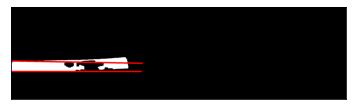

In [211]:
line_img, lines, edges = line_detection(closing.copy())
print(lines)
showImages([line_img])
# cv_show(line_img)

In [ ]:
y = ax + b
y0 = ax0 + b
y - y0 = a(x-x0)
y = y0 + a(x-x0)

ax + b = y0 + a(x-x0)


In [207]:
def line_houghP(image):
#     gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = image
    color_img = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    edges = cv2.Canny(gray, 50, 150, apertureSize = 3)    #apertureSize是sobel算子大小，只能为1,3,5，7
    lines = cv2.HoughLinesP(edges, 1, (np.pi/180)*1, 200)  #函数将通过步长为1的半径和步长为π/180的角来搜索所有可能的直线
    for line in lines:
        print("Line -> ", line)
        x0 = line[0][0]
        y0 = line[0][1]
        x1 = line[0][2]
        y1 = line[0][3]
        line_img = cv2.line(color_img,(x0, y0), (x1, y1), (255, 0, 0), 10) #开始划线
    return line_img

Line ->  [[286 416 316 416]]
Line ->  [[ 52 420  52 420]]
Line ->  [[889 406 890 406]]
Line ->  [[152 418 183 418]]
Line ->  [[313 502 394 502]]
Line ->  [[532 411 542 411]]


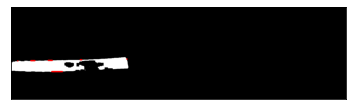

In [208]:
line_P = line_houghP(closing.copy())
showImages([line_P])
# cv_show(line_P)

In [239]:
def RotateClockWise90(img):
    trans_img = cv2.transpose( img )
    new_img = cv2.flip(trans_img, 1)
    return new_img

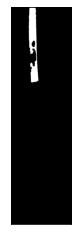

In [240]:
c_copy1 = RotateClockWise90(closing.copy())
showImages([c_copy1])

In [245]:
print(c_copy1[0][1])

0


In [266]:

white_list = []
count = 0;
for line in c_copy1:
    whit_num = 0
    for pixel in line:
        if(pixel == 255):
            whit_num = whit_num + 1
    white_list.append(whit_num)
#     if(count > 10):
#         break
    count = count + 1
print(white_list)
white_list.sort(reverse=True)
print(white_list)

[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 73, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 77, 77, 79, 79, 78, 78, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 78, 78, 78, 78, 78, 80, 78, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 80, 80, 80, 80, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 84, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 84, 84, 84, 84, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,

In [267]:
cal_white_list = white_list[:200]
print(cal_white_list)
average=sum(cal_white_list)/len(cal_white_list)
print("average*0.65 -> ", average*0.65)

[89, 89, 89, 89, 89, 89, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86]
average*0.65 ->  56.524


In [293]:
a_test = np.array([white_list])
zero = np.sum(a_test == 0)
print(zero)
number = np.sum(a_test < average * 0.65)
print(number)

1671
1914


In [280]:
import numpy as np
aa = np.random.randint(-5, 5, (1, 10))
c=np.sum(a>=1)                    #条件为大于等于1
print ("随机数组a  :  "+str(a)) #输出数组a
print ("大于等于1的个数:  "+str(c)) #输出满足条件的个数


随机数组a  :  [[ 3  0 -3  4 -3 -4  1 -2 -3 -3]]
大于等于1的个数:  3


In [ ]:

for line in c_copy1:
    print(len(line))

In [220]:
c_copy1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

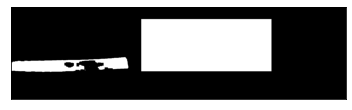

In [234]:
# c_copy1[100:500,1000:2000] = 255
# showImages([c_copy1])

In [228]:
print("img.shape -> ", img.shape)
print(len(c_copy1))
print(len(c_copy1[0]))

img.shape ->  (712, 2572, 3)
712
2572


In [231]:
c_copy1 = 0
# showImages([c_copy1])